In [1]:
from PyContact.core.ContactManager import ContactManager
from PyContact.core.ContactAnalyzer import ContactAnalyzer
topo = "PyContact/exampleData/rpn11_ubq.psf"
trajs = ["PyContact/exampleData/rpn11_ubq.dcd"]
man = ContactManager(topo, trajs, 5.0, 2.5, 120, "segid RN11", "segid UBQ")
man.readTrajectories(nproc=4)
man.accumulateContacts(map1=[0,0,1,1,0], map2=[0,0,1,1,0])
# ct = ContactAnalyzer(man.atomicContactTrajectories[0], [1,1,1,1,1], [1,1,1,1,1]).accumulateContacts()

(array([  0,   9,  11,  13,  19,  20,  22,  24,  28,  34,  39,  45,  54,
        58,  60,  61,  62,  75,  77,  79,  84,  89,  91,  92,  94,  95,
        96, 113]),)


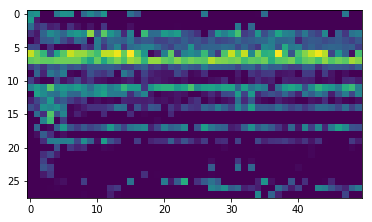

In [14]:
# test filters
from PyContact.core.ContactFilters import get_contacts_of_type, get_subrange
import matplotlib.pyplot as plt

ctrj = man.accumulatedContactTrajectories[0]

# cf = get_subrange(ctrj.contactScores, [25, 44])

mask = get_contacts_of_type(ctrj.contactTypes, "hbonds")
plt.imshow(ctrj.contactScores[mask[0],:])
print(mask)